In [14]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from IPython.display import HTML
from scipy import linalg as LA
import random
import numpy.matlib
import kwant
import tinyarray
import multiprocessing as mp
import os
from tqdm import tqdm
import helpers as hp
from pathlib import Path
from config import PathConfigs
import scipy.sparse.linalg as sla
import multiprocessing as mp
from functools import partial
from scipy.signal import find_peaks
import itertools as itr

#pauli matrices
sigma_0 = tinyarray.array([[1, 0], [0, 1]])
sigma_x = tinyarray.array([[0, 1], [1, 0]])
sigma_y = tinyarray.array([[0, -1j], [1j, 0]])
sigma_z = tinyarray.array([[1, 0], [0, -1]])

In [15]:
####### System Parameters
t = 102.0
mu = 1.3
mu_n = 0.2
mu_leads = 20.0
Delta = 0.5
alpha = 3.5
Ln = 20 # normal metal length
Lb = 4 #barrier length
Ls = 500 #super conductor length
#V_c = np.sqrt(mu**2 + Delta**2)
barrier0 = 5


## setting up different tests
#V0 = 0.0  * Delta 
#dirname = 'reruncorr_clean_dis_test'

#V0 = 3.5  * Delta 
#dirname = 'new_corr_med_dis_test'    #corr_med_dis_test

V0 = 10.5 * Delta 
dirname = 'barriers_stong_dis_test'  #corr_stong_dis_test

Upoints = 50 
num_engs = 101  
num_vz_var = 61
num_mu_var= 61

mu_rng = 0.5
mu_var = np.linspace(1-mu_rng, 1+mu_rng, num_mu_var)
Vz_var = np.linspace(0.6, 1.7, num_vz_var) 
params_list = [pms for pms in itr.product(mu_var, Vz_var)]
params_list = [[i, pms[0], pms[1]] for i, pms in enumerate(params_list)]


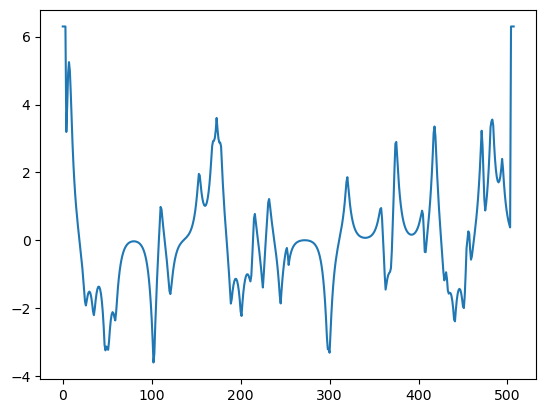

In [16]:
fname = "med_dis_data/nontopological/nontopo-zbp-corr-badldos/Data.npz"
path = "/home/pseudonym/code/Nonlocal_Conductance/Nonlocality-of-local-Andreev-conductances-as-a-probe-for-topological-Majorana-wires/Run_Files/Data.npz"
Vdisx = hp.initialize_vdis_from_data(path) * V0

V_left_barrier =   np.ones(shape = Lb) * (barrier0 + mu)    
V_right_barrier =  np.ones(shape = Lb) * (barrier0 + mu)

full_Vdisx = np.concatenate([V_left_barrier, Vdisx, V_right_barrier])

plt.plot(full_Vdisx)